# XOR_SA2

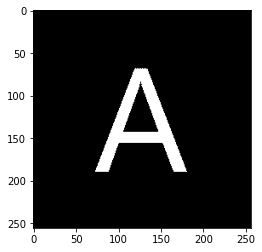

In [1]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray")

{'success': True, 'contrast': 0.043849470631662696, 'nitr': 24000, 'variables': array([[0.        , 0.05443907, 0.60458091, 0.34098002],
       [0.        , 0.9634788 , 0.0365212 , 0.        ],
       [0.64525805, 0.84959983, 1.        , 0.50483373]]), 'safety': [0.032112068653549576, 0.03091002521107859]}
False


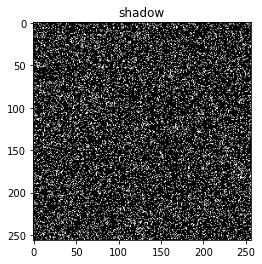

In [2]:
from optimize import optimize_xor_sa2

K = 3
result = optimize_xor_sa2(K, ws=50)
print(result)
if result.success:
    p0 = result.variables[0]  # 白色选择随机数发生器的概率
    p1 = result.variables[1]  # 黑色选择随机数发生器的概率
    rx = result.variables[2]  # 随机数发生器输出0(False/白色)的概率

shadows = [np.zeros(secret.shape, dtype=bool) for _ in range(K)]
D = np.zeros(secret.shape, dtype=int)
for (i, j), is_black in np.ndenumerate(secret):
    prob = p1 if is_black else p0
    rand_no = np.random.choice(a=K + 1, p=prob)
    D[i, j] = rand_no
    rand_white = rx[rand_no]
    for sh in shadows:
        sh[i, j] = np.random.choice(a=[False, True], p=[rand_white, 1 - rand_white])

plt.title("shadow")
plt.imshow(shadows[0],cmap="gray")
print((shadows[0]==shadows[1]).all())

In [3]:
from optimize import xor_safety_penalty_list
xor_safety_penalty_list(result.variables)

[0.032112068653549576, 0.03091002521107859]

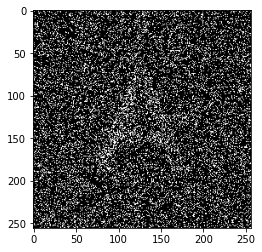

In [4]:
reveal_old=shadows[0]
for sd in shadows[1:]:
    reveal_old=np.logical_xor(reveal_old,sd)
plt.imshow(reveal_old,cmap="gray")

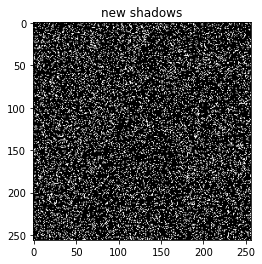

In [5]:
new_shadows = [np.zeros(secret.shape, dtype=bool) for _ in range(K)]
for (i, j), is_black in np.ndenumerate(secret):
    rand_white = rx[D[i, j]]
    for sh in new_shadows:
        sh[i, j] = np.random.choice(a=[False, True], p=[rand_white, 1 - rand_white])

plt.title("new shadows")
plt.imshow(new_shadows[0],cmap="gray")

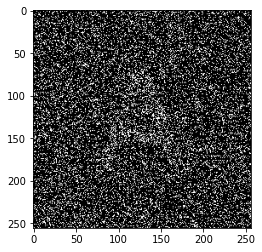

In [7]:
reveal_new=new_shadows[0]
for sd in new_shadows[1:]:
    reveal_new=np.logical_xor(reveal_new,sd)
plt.imshow(reveal_new,cmap="gray")